# The `io` module

The `io` module enables loading of different input formats and conversion to different output formats.

Currently supported are:


| Input | Output |
| :--- | :--- |
| _mol2_ (file, text) | `pandas.DataFrame` |
| _pdb_ (file, text) | `pandas.DataFrame` |
| _mol2_ (file, text) | `rdkit.Chem.rdchem.Mol` |

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [3]:
pd.set_option("display.max_rows", 5)

In [4]:
DATA_PATH = Path("../../opencadd/tests/data/io") 

## Load DataFrames: `io.dataframes`

Return data from different input formats as DataFrame with the following __default__ columns:

- `atom.id`: Atom serial number.
- `atom.name`: Atom name.
- `atom.x`, `atom.y`, `atom.z`: Orthogonal coordinates for X, Y, Z in Angstroms.
- `atom.charge`: Atom charge.
- `residue.pdb_id`: Residue PDB ID.
- `residue.name`: Residue name.

It is also possible to return a DataFrame in the __verbose__ version, that contains additional columns available in the input format (but not in other input formats).

Columns available from the _mol2_ format only are:

- `atom.type`: SYBYL atom type set in the _mol2_ format.
- `residue.subst_id`: ID number of the substructure containing the atom.
- `residue.subst_name`: Name of the substructure containing the atom: Residue name + residue PDB ID.

Columns available in the _pdb_ format only are:

- `record.name`: Record name set in the _pdb_ format, i.e. `ATOM` or `HETATM`.
- `atom.symbol`: Atom symbol.
- `atom.occupancy`: Atom occupancy.
- `atom.bfactor`: Atom B factor.
- `atom.alternative_model`: Alternative atom positions.
- `structure.chain`: Structure chain.

In [5]:
from opencadd.io.dataframes import Mol2ToDataFrame, PdbToDataFrame

### From the _mol2_ format

Check out the _mol2_ format [here](http://rasbt.github.io/biopandas/tutorials/Working_with_MOL2_Structures_in_DataFrames/#the-mol2-data-format). 

In [6]:
mol2_to_df = Mol2ToDataFrame()

__From _mol2_ files__: Return a _mol2_ file's content as DataFrame (_mol2_ files can have 9 (default) or 10 columns).

In [7]:
# Mol2 files with 10 columns
mol2_to_df.from_file(DATA_PATH / "2itz_chainA_protein.mol2")

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.charge,residue.pdb_id,residue.name
0,1,N,3.5231,35.9331,15.5964,1.0,697,GLU
1,2,H1,3.0492,36.7821,15.3230,0.0,697,GLU
...,...,...,...,...,...,...,...,...
4879,4880,H1,4.0174,42.8405,37.2040,0.0,1020,GLN
4880,4881,H2,4.1575,42.8739,38.9474,0.0,1020,GLN


In [8]:
# Mol2 files with 9 columns
mol2_to_df.from_file(DATA_PATH / "2itz_protein.mol2")

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.charge,residue.pdb_id,residue.name
0,1,C,-68.0100,-5.4980,-49.0280,0.0,697,GLU
1,2,O,-67.9160,-4.9160,-50.1190,0.0,697,GLU
...,...,...,...,...,...,...,...,...
4881,4882,H1,-58.8856,-15.6794,-31.0692,0.0,3045,HOH
4882,4883,H2,-57.7611,-16.4922,-30.3103,0.0,3045,HOH


In order to get all columns from the input, set `verbose=True`.

In [9]:
mol2_to_df.from_file(DATA_PATH / "2itz_chainA_protein.mol2", verbose=True)

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.charge,residue.pdb_id,residue.name,atom.type,residue.subst_id,residue.subst_name,atom.status_bit
0,1,N,3.5231,35.9331,15.5964,1.0,697,GLU,N.4,1,GLU697,BACKBONE
1,2,H1,3.0492,36.7821,15.3230,0.0,697,GLU,H,1,GLU697,BACKBONE
...,...,...,...,...,...,...,...,...,...,...,...,...
4879,4880,H1,4.0174,42.8405,37.2040,0.0,1020,GLN,H,303,GLN1020,BACKBONE
4880,4881,H2,4.1575,42.8739,38.9474,0.0,1020,GLN,H,303,GLN1020,BACKBONE


__From _mol2_ text__: Return a _mol2_ string (text) as DataFrame. This functionality is useful if you are fetching data directly from a website like [PDB](https://www.rcsb.org/) or [KLIFS](https://klifs.vu-compmedchem.nl/).

In [10]:
# Let's load a file's content as string (text) to simulate example input data
with open(DATA_PATH / "2itz_chainA_protein.mol2", "r") as f:
    text = f.read()

In [11]:
mol2_to_df.from_text(text)

,atom.id,atom.name,atom.x,atom.y,atom.z,atom.charge,residue.pdb_id,residue.name
0,1,N,3.5231,35.9331,15.5964,1.0,697,GLU
1,2,H1,3.0492,36.7821,15.3230,0.0,697,GLU
...,...,...,...,...,...,...,...,...
4879,4880,H1,4.0174,42.8405,37.2040,0.0,1020,GLN
4880,4881,H2,4.1575,42.8739,38.9474,0.0,1020,GLN


### From the _pdb_ format

Check out the _pdb_ format [here](https://www.wwpdb.org/documentation/file-format-content/format33/sect9.html).

In [12]:
pdb_to_df = PdbToDataFrame()

__From _pdb_ file__:  Return a _pdb_ file's content as DataFrame (`ATOM` and `HETATM` entries only). 

In [13]:
pdb_to_df.from_file(DATA_PATH / "2itz.pdb")

,atom.id,atom.name,atom.x,atom.y,atom.z,residue.name
0,1,N,-67.939,-7.787,-50.119,GLU
1,2,CA,-67.651,-6.991,-48.900,GLU
...,...,...,...,...,...,...
95,2512,O,-60.661,8.159,-21.872,HOH
96,2513,O,-69.189,8.275,-36.944,HOH


In order to get all columns from the input, set `verbose=True`.

In [14]:
pdb_to_df.from_file(DATA_PATH / "2itz.pdb", verbose=True)

,atom.id,atom.name,atom.x,atom.y,atom.z,residue.name,record.name,atom.symbol,atom.occupancy,atom.bfactor,atom.alternative_model,structure.chain
0,1,N,-67.939,-7.787,-50.119,GLU,ATOM,N,1.0,62.04,,A
1,2,CA,-67.651,-6.991,-48.900,GLU,ATOM,C,1.0,61.73,,A
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2512,O,-60.661,8.159,-21.872,HOH,HETATM,O,1.0,48.79,,A
96,2513,O,-69.189,8.275,-36.944,HOH,HETATM,O,1.0,44.00,,A


__From _pdb_ text__: Return a _pdb_ string (text) as DataFrame (`ATOM` and `HETATM` entries only). 

In [15]:
# Let's load a file's content as string (text) to simulate example input data
with open(DATA_PATH / "2itz.pdb", "r") as f:
    text = f.read()

In [16]:
pdb_to_df.from_text(text)

,atom.id,atom.name,atom.x,atom.y,atom.z,residue.name
0,1,N,-67.939,-7.787,-50.119,GLU
1,2,CA,-67.651,-6.991,-48.900,GLU
...,...,...,...,...,...,...
95,2512,O,-60.661,8.159,-21.872,HOH
96,2513,O,-69.189,8.275,-36.944,HOH


## Load RDKit molecules: `io.rdkit`

__Note__: RDKit is a cheminformatics toolkit that focuses on working with small molecules. Technically you can load protein structures as RDKit molecule, however we recommend to use this data structure for small molecules only.

In [17]:
from opencadd.io.rdkit import Mol2ToRdkitMol

### From the _mol2_ format

In [18]:
mol2_to_rmol = Mol2ToRdkitMol()

__From _mol2_ files__: Return a _mol2_ file's content as DataFrame (_mol2_ files can have 9 (default) or 10 columns).

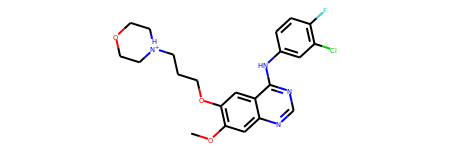

In [19]:
mol2_to_rmol.from_file(DATA_PATH / "2itz_chainA_ligand.mol2")

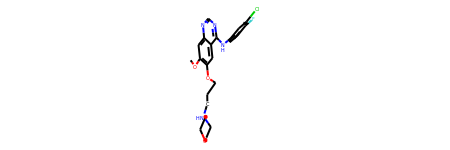

In [20]:
mol2_to_rmol.from_file(DATA_PATH / "2itz_chainA_ligand.mol2", compute2d=False)

__From _mol2_ text__: Return a _mol2_ string (text) as DataFrame. This functionality is useful if you are fetching data directly from a website like [KLIFS](https://klifs.vu-compmedchem.nl/).

In [21]:
# Let's load a file's content as string (text) to simulate example input data
with open(DATA_PATH / "2itz_chainA_ligand.mol2", "r") as f:
    text = f.read()

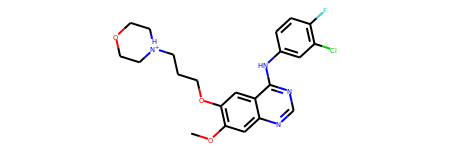

In [22]:
mol2_to_rmol.from_text(text)